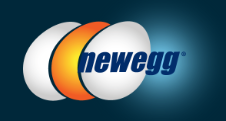

# Objective

Webscraping using selenium on python, to extract and creat a dataframe from the https://www.newegg.com/ that contain gaming laptops information, such as laptop price, review, ...etc.

This dataframe can be analysis to get insights and answer questions can like why certain laptops are popular.

In [135]:
# importing libraries
import numpy as np
import requests
import re
import pandas as pd
from bs4 import BeautifulSoup
from time import sleep
from selenium import webdriver

In [151]:
# using webdriver and get the page
driver = webdriver.Chrome(executable_path='C:/Users/Satoshi/Downloads/Programs/chromedriver')
driver.get('https://www.newegg.com/p/pl?N=100157995&page=1&order=REVIEWS')

# empty list to append all the htmls for a given pages
htmls=[]

# Delay execution for a given number of seconds, for the page to load
sleep(7) 

# for loop that iterate throu the first 8 pages
for i in range(0,8):
    # property/attribute -- Gets the source of the current page.
    html = driver.page_source 
    # append the current page html to the list
    htmls.append(html)
    # find next page location 
    enter_button =driver.find_element_by_xpath("//button[@aria-label='Next']")
    # push next page 
    enter_button.click()
    # another sleep
    sleep(7)

# close the driver
driver.close()

In [138]:
# finding laptop name and creat a list for all laptop names

# empty list for laptop name
laptop_name = []

# iterat throu htmls in BeautifulSoup
for i in htmls:
    response = BeautifulSoup(i,'html.parser')
    # find all laptop names in each html
    for i in response.find_all('a' , {'class':'item-title'}):
        # append laptop name
        laptop_name.append(i.text)
# check the length and list of laptop names
print(len(laptop_name))
laptop_name

288


['GIGABYTE AERO 15-X9-9RT4K5MP 15.6" 4K/UHD IPS Intel Core i9 8th Gen 8950HK (2.90 GHz) NVIDIA GeForce RTX 2070 32 GB Memory 1 TB SSD Windows 10 Pro 64-bit Gaming Laptop',
 'Lenovo Y50 Touch (59426255) 15.6" Intel Core i7 4th Gen 4700HQ (2.40 GHz) NVIDIA GeForce GTX 860M 8 GB Memory 8 GB SSD 1 TB HDD Windows 8.1 64-Bit Gaming Laptop',
 'MSI GP63 Leopard-013 Gaming Laptop GTX 1060 6 GB i7-8750H  15.6" Windows 10 Home 64-bit',
 'MSI GS Series GS65 Stealth THIN-053 Gaming Laptop GTX 1070 i7-8750H 15.6" Windows 10 Pro 64-Bit',
 'Acer Aspire V15 Nitro Black Edition VN7-591G-70RT 15.6" IPS Intel Core i7 4th Gen 4720HQ (2.60 GHz) NVIDIA GeForce GTX 960M 8 GB Memory 1 TB HDD Windows 8.1 64-Bit Gaming Laptop',
 'Acer Aspire 7 17.3" IPS FHD 60 Htz  GTX 1060 6 GB VRAM 8th Gen Intel 6-core i7-8750H 16 GB Memory 256 GB SSD Windows 10 Home VR Ready Gaming Laptop A717-72G-700J - ONLY @ NEWEGG',
 'Lenovo Y700-17ISK (80Q000C0US) 17.3" IPS Intel Core i7 6th Gen 6700HQ (2.60 GHz) NVIDIA GeForce GTX 960M 

In [139]:
# finding laptop name and creat a list for all laptop prices

# empty list for laptop price
price = []
# iterat throu htmls in BeautifulSoup
for i in htmls:
    response = BeautifulSoup(i,'html.parser')
    # find all laptop prices in each html
    for i in response.find_all('li' , {'class':'price-current'}):
        # append laptop price
        price.append(str(i.strong))

# creat empty list for cleaning the prices
a=[]
for i in price:

    try:
        a.append(i.split('>')[1].split('<')[0])
        
    except IndexError as error:
        a.append(i.split('>')[0])



# prices after cleaning
price = a
print(len(price))
price

288


In [142]:
# same for brand name
company_name = []
for i in htmls:
    response = BeautifulSoup(i,'html.parser')
    for i in response.find_all('a' , {'class':'item-brand'}):
        company_name.append(i.img['title'])
print(len(company_name))
company_name

288


['GIGABYTE',
 'Lenovo',
 'MSI',
 'MSI',
 'Acer America',
 'Acer America',
 'Lenovo',
 'MSI',
 'DELL',
 'ASUS',
 'ASUS',
 'ASUS',
 'ASUS',
 'Acer America',
 'MSI',
 'GIGABYTE',
 'Acer America',
 'ASUS',
 'ASUS',
 'ASUS',
 'DELL',
 'ASUS',
 'Lenovo',
 'Acer America',
 'RAZER',
 'Lenovo',
 'MSI',
 'AORUS',
 'MSI',
 'ASUS',
 'ASUS',
 'ASUS',
 'ASUS',
 'Acer America',
 'Acer America',
 'MSI',
 'ASUS',
 'ASUS',
 'ASUS',
 'Acer America',
 'ASUS',
 'ASUS',
 'Acer America',
 'MSI',
 'MSI',
 'MSI',
 'ASUS',
 'ASUS',
 'Acer America',
 'ASUS',
 'ASUS',
 'ASUS',
 'Acer America',
 'GIGABYTE',
 'GIGABYTE',
 'MSI',
 'ASUS',
 'ASUS',
 'MSI',
 'Acer America',
 'MSI',
 'RAZER',
 'Acer America',
 'ASUS',
 'Acer America',
 'ASUS',
 'ASUS',
 'Acer America',
 'MSI',
 'RAZER',
 'MSI',
 'ASUS',
 'Lenovo',
 'ASUS',
 'Eluktronics',
 'ASUS',
 'ASUS',
 'MSI',
 'ASUS',
 'ASUS',
 'ASUS',
 'Lenovo',
 'ASUS',
 'Acer America',
 'HP',
 'ASUS',
 'ASUS',
 'MSI',
 'MSI',
 'ASUS',
 'ASUS',
 'MSI',
 'Lenovo',
 'DELL',
 'Acer

In [145]:
# the same also for the rating
rating = []
for i in htmls:
    response = BeautifulSoup(i,'html.parser')
    for i in response.find_all('a' , {'class':'item-rating'}):
        rating.append(i['title'])
print(len(rating))
rating

254


['Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 3',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 3',
 'Rating + 3',
 'Rating + 5',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 2',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 5',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating + 4',
 'Rating + 3',
 'Rating + 4',
 'Rating +

In [189]:
# same for the number of people to rate
num_to_rate = []
for i in htmls:
    response = BeautifulSoup(i,'html.parser')
    for i in response.find_all('span' , {'class':'item-rating-num'}):
        num_to_rate.append(i.string)
        
a=[]
for i in num_to_rate:
    i = i.replace('(','')
    i = i.replace(')','')
    a.append(i)
    
num_to_rate = a
print(len(num_to_rate))
num_to_rate

254


['363',
 '186',
 '156',
 '155',
 '100',
 '99',
 '99',
 '92',
 '72',
 '51',
 '50',
 '42',
 '42',
 '41',
 '38',
 '34',
 '33',
 '32',
 '31',
 '29',
 '28',
 '26',
 '26',
 '25',
 '24',
 '24',
 '24',
 '23',
 '23',
 '20',
 '20',
 '20',
 '18',
 '18',
 '18',
 '17',
 '17',
 '17',
 '15',
 '15',
 '15',
 '14',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '13',
 '12',
 '11',
 '11',
 '10',
 '10',
 '10',
 '10',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '8',
 '8',
 '8',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '7',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '6',
 '5',
 '5',
 '5',
 '5',
 '5',
 '5',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '2',
 '

In [190]:
# same for the type of shipping
shiping = []
for i in htmls:
    response = BeautifulSoup(i,'html.parser')
    for i in response.find_all('li' , {'class':'price-ship'}):
        shiping.append(i.string)
print(len(shiping))

a=[]
for i in shiping:
    i = i.replace('\n        ','')
    i = i.replace('\n    ','')
    a.append(i)
shiping = a
shiping

288


['Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Special Shipping',
 '$5.40 Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 '$22.99 Shipping',
 'Free Shipping',
 'Special Shipping',
 '$9.99 Shipping',
 'Free Shipping',
 'Special Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 '$23.99 Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 '$5.28 Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipping',
 'Free Shipp

In [179]:
# same for the discounts
prom = []
for i in htmls:
    response = BeautifulSoup(i,'html.parser')
    for i in response.find_all('li' , {'class':'price-save'}):
        prom.append(i.text)
print(len(prom))

a=[]
for i in prom:
    i = i.replace('\nSale Ends in 2 Days (Mon) - \nSale Ends in 11/18 - \n','')
    i = i.strip('\n')
    i = i.replace('Save: \n\n','')
    a.append(i)
prom = a
prom

288


['',
 '',
 '',
 '',
 '',
 '29%',
 '19%',
 '23%',
 '20%',
 '',
 '',
 '15%',
 '',
 '',
 '22%',
 '21%',
 '',
 '',
 '',
 '10%',
 '31%',
 '17%',
 '',
 '',
 '',
 '',
 '',
 '',
 '23%',
 '',
 '',
 '',
 '',
 '25%',
 '',
 '23%',
 '',
 '',
 '25%',
 '',
 '',
 '',
 '25%',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '13%',
 '',
 '33%',
 '18%',
 '5%',
 '40%',
 '23%',
 '15%',
 '',
 '',
 '',
 '37%',
 '36%',
 '',
 '',
 '',
 '',
 '60%',
 '23%',
 '',
 '',
 '',
 '',
 '23%',
 '13%',
 '',
 '',
 '',
 '',
 '26%',
 '21%',
 '',
 '',
 '30%',
 '5%',
 '',
 '',
 '23%',
 '6%',
 '',
 '',
 '30%',
 '11%',
 '',
 '',
 '',
 '',
 '',
 '23%',
 '24%',
 '',
 '',
 '16%',
 '',
 '28%',
 '13%',
 '8%',
 '',
 '',
 '13%',
 '',
 '35%',
 '5%',
 '23%',
 '5%',
 '',
 '',
 '',
 '',
 '',
 '8%',
 '',
 '',
 '26%',
 '',
 '',
 '25%',
 '',
 '',
 '30%',
 '',
 '8%',
 '23%',
 '',
 '22%',
 '',
 '',
 '23%',
 '25%',
 '42%',
 '',
 '',
 '',
 '',
 '',
 '34%',
 '',
 '',
 '',
 '23%',
 '',
 '',
 '',
 '25%',
 '',
 '11%',
 '26%',
 '',
 '23%',
 '23%',
 '',
 '',
 '',
 

In [360]:
# creat dataframe that contain all the previous list created
df = pd.DataFrame({'laptop_name':laptop_name[:254] ,
              'price':price[:254],
             'brand_name':company_name[:254] ,
             'rating':rating[:254] ,
              'num_to_rate':num_to_rate,
             'shiping':shiping[:254] , 
             'save_prec':prom[:254]})
df.head()

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec
0,"GIGABYTE AERO 15-X9-9RT4K5MP 15.6"" 4K/UHD IPS ...","3,099",GIGABYTE,Rating + 4,363,Free Shipping,
1,"Lenovo Y50 Touch (59426255) 15.6"" Intel Core i...","1,684",Lenovo,Rating + 3,186,Free Shipping,
2,MSI GP63 Leopard-013 Gaming Laptop GTX 1060 6 ...,"1,530",MSI,Rating + 4,156,Free Shipping,
3,MSI GS Series GS65 Stealth THIN-053 Gaming Lap...,"2,499",MSI,Rating + 4,155,Free Shipping,
4,Acer Aspire V15 Nitro Black Edition VN7-591G-7...,895,Acer America,Rating + 4,100,Free Shipping,


In [361]:
# replacesing '' with np.nan
df['save_prec'] = df['save_prec'].replace('' , np.nan)
df.head()

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec
0,"GIGABYTE AERO 15-X9-9RT4K5MP 15.6"" 4K/UHD IPS ...","3,099",GIGABYTE,Rating + 4,363,Free Shipping,NaN
1,"Lenovo Y50 Touch (59426255) 15.6"" Intel Core i...","1,684",Lenovo,Rating + 3,186,Free Shipping,NaN
2,MSI GP63 Leopard-013 Gaming Laptop GTX 1060 6 ...,"1,530",MSI,Rating + 4,156,Free Shipping,NaN
3,MSI GS Series GS65 Stealth THIN-053 Gaming Lap...,"2,499",MSI,Rating + 4,155,Free Shipping,NaN
4,Acer Aspire V15 Nitro Black Edition VN7-591G-7...,895,Acer America,Rating + 4,100,Free Shipping,NaN


In [362]:
# feature engineer a column tha indicate if the laptop have touch screen or not
df.laptop_name.apply(lambda x:1 if 'Touch' in x else 0)

0      0
1      1
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
224    0
225    0
226    0
227    0
228    0
229    0
230    0
231    0
232    0
233    0
234    0
235    0
236    0
237    0
238    0
239    0
240    0
241    0
242    1
243    0
244    1
245    0
246    0
247    0
248    0
249    1
250    0
251    0
252    0
253    0
Name: laptop_name, Length: 254, dtype: int64

In [363]:
# feature engineer from the laptop name, using regular expression that get the display size
# creat empty list
display = []
# iterate throu laptop name
for i in df.laptop_name:
    # try to find display size and append it
    try:
        display.append(re.search('(\d+.\d)("|”)',i).group(0))
    # if regular expression find none it will append null instead
    except:
        display.append(np.nan)

print(len(display))
display

254


['15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '17.3"',
 '17.3"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '17.3"',
 '15.6"',
 '15.6"',
 '17.3"',
 '15.6"',
 '17.3"',
 '15.6"',
 '17.3"',
 '17.3"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '14.0"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '17.3"',
 '15.6"',
 '17.3"',
 '15.6"',
 '17.3"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '18.4"',
 '15.6"',
 '15.6"',
 '15.6"',
 '17.3"',
 '17.3"',
 '15.6”',
 '17.3"',
 '15.6"',
 '17.3"',
 nan,
 '15.6"',
 '17.3"',
 '15.6"',
 '17.3"',
 '17.3"',
 '17.3"',
 '15.6"',
 nan,
 '17.3"',
 nan,
 '17.3"',
 '17.3"',
 '15.6"',
 '15.6"',
 '17.3"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '17.3"',
 '15.6”',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6”',
 '15.6"',
 '15.6"',
 nan,
 '15.6"',
 '17.3"',
 '17.3"',
 '15.6"',
 '17.3"',
 '17.3"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6"',
 '17.3"',
 '15.6"',
 '17.3"',
 '15.6"',
 '15.6"',
 '15.6"',
 '15.6

In [364]:
# feature engineer from the laptop name, using regular expression that get the processor name 
# same process fpr the other features
processor = []
for i in df.laptop_name:
    try:
        processor.append(re.search('(i|R)(\d)',i).group(0))
    except:
        processor.append(np.nan)

print(len(processor))
processor

254


['i9',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i5',
 'i7',
 'i7',
 'i7',
 'i5',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i5',
 'i7',
 'i7',
 'i7',
 'R3',
 'R0',
 'i5',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'R5',
 'R0',
 'i7',
 'i7',
 'i7',
 'i7',
 'i5',
 'i5',
 'R7',
 'i5',
 'i7',
 'i5',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i5',
 'i7',
 'i5',
 'i7',
 'i5',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'R3',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 nan,
 'i7',
 'i7',
 nan,
 'i7',
 'i7',
 'R5',
 'i7',
 'i7',
 'i5',
 'i7',
 'i9',
 'i7',
 'R4',
 'R5',
 'i7',
 'R5',
 'i7',
 'i7',
 'i7',
 'i7',
 'R3',
 'i7',
 'i5',
 'i7',
 'i7',
 'i7',
 'i7',
 'i5',
 'i5',
 'i7',
 'i7',
 'i7',
 'R5',
 'i7',
 'R0',
 'i7',
 'i9',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'i7',
 'R5',
 'i5',
 'i7',
 'i7',
 'R7',
 'i7',
 'i9',
 'i7',
 'i9',
 'i7',
 'R5',
 'i7',
 'i7',
 'i7',
 'i7',
 'R0',
 'i7',
 'i7',
 'i7',
 

In [365]:
# feature engineer from the laptop name, using regular expression that get the gpu name and size
# same process fpr the other features
gpu = []
for i in df.laptop_name:
    try:
        gpu.append(re.search('((RTX|RTX\s)|(GTX|GTX\s))(\d+)',i).group(0))
    except:
        gpu.append(np.nan)

print(len(gpu))
gpu

254


['RTX 2070',
 'GTX 860',
 'GTX 1060',
 'GTX 1070',
 'GTX 960',
 'GTX 1060',
 'GTX 960',
 'GTX 1060',
 'GTX 960',
 'GTX 950',
 'GTX 1050',
 'RTX 2070',
 'GTX 1050',
 'GTX 1060',
 'GTX 1050',
 'RTX 2070',
 'GTX 1060',
 'GTX 1050',
 'GTX 1070',
 'GTX 1060',
 'GTX 1050',
 'GTX 1080',
 'GTX 1050',
 'GTX 1070',
 'GTX 765',
 'GTX 1060',
 'GTX 1050',
 'RTX 2070',
 'RTX 2070',
 'RTX 2070',
 'GTX 860',
 'GTX 1050',
 'RTX 2080',
 'GTX 1050',
 nan,
 'GTX 1070',
 'GTX 1050',
 'GTX 1050',
 'GTX 1060',
 'GTX 1050',
 'GTX 1050',
 'GTX 1650',
 'GTX 1050',
 'GTX 1070',
 'RTX 2060',
 nan,
 'GTX 1060',
 'GTX 1050',
 'GTX 1070',
 'GTX 1050',
 'RTX 2080',
 'GTX 860',
 'GTX 1070',
 'GTX 1660',
 'RTX 2060',
 'RTX 2080',
 'GTX 1050',
 'RTX 2080',
 'RTX 2060',
 'GTX 1070',
 'GTX 1650',
 'GTX 1060',
 'GTX 1080',
 'GTX 1050',
 'GTX 1070',
 'GTX 1060',
 'RTX 2070',
 'GTX 1060',
 'RTX 2070',
 'GTX 1060',
 'GTX 1050',
 'GTX 1050',
 'GTX 860',
 'GTX 1060',
 'GTX 1660',
 'GTX 1060',
 nan,
 'GTX 1070',
 'GTX 1050',
 'G

In [366]:
# feature engineer from the laptop name, using regular expression that get the ssd size or np.nan if there is no 
# same process fpr the other features
ssd = []
for i in df.laptop_name:
    try:
        ssd.append(re.search('(\d+)((\sGB|GB)|(\sTB|TB))(\s|\sPCIe\s|\sNVMe\s)(SSD|Solid State Drive)',i).group(0))
    except:
        ssd.append(np.nan)

print(len(ssd))
ssd

254


['1 TB SSD',
 '8 GB SSD',
 nan,
 nan,
 nan,
 '256 GB SSD',
 '128 GB SSD',
 '256GB SSD',
 '8 GB SSD',
 nan,
 '256 GB SSD',
 '512 GB PCIe SSD',
 '256 GB SSD',
 '256 GB SSD',
 '256 GB NVMe SSD',
 nan,
 '128 GB SSD',
 nan,
 '256 GB PCIe SSD',
 '256 GB SSD',
 nan,
 '512 GB PCIe SSD',
 '256 GB SSD',
 '256 GB SSD',
 '256 GB SSD',
 '128 GB SSD',
 '256 GB SSD',
 nan,
 '256 GB NVMe SSD',
 nan,
 nan,
 '256 GB SSD',
 '1 TB SSD',
 nan,
 '256 GB SSD',
 nan,
 '256 GB SSD',
 '8 GB SSD',
 '256 GB PCIe SSD',
 nan,
 '256 GB SSD',
 '512 GB PCIe SSD',
 '256 GB SSD',
 '512 GB SSD',
 '256 GB NVMe SSD',
 nan,
 nan,
 '256 GB SSD',
 '256 GB SSD',
 '128GB SSD',
 '512 GB PCIe SSD',
 nan,
 '256 GB SSD',
 nan,
 '512 GB SSD',
 '256 GB NVMe SSD',
 '128 GB PCIe SSD',
 nan,
 '256 GB NVMe SSD',
 '256 GB SSD',
 '256 GB NVMe SSD',
 '512 GB SSD',
 '256 GB SSD',
 nan,
 '256 GB SSD',
 '256 GB SSD',
 nan,
 '256 GB SSD',
 '512 GB NVMe SSD',
 '128 GB SSD',
 '128 GB SSD',
 '512 GB SSD',
 '8GB SSD',
 nan,
 '512GB NVMe SSD',
 '512

In [367]:
# same process fpr the other features
hdd = []
for i in df.laptop_name:
    try:
        hdd.append(re.search('(\d+)((\sGB|GB)|(\sTB|TB))(\s|)(HDD|Hard Drive)',i).group(0))
    except:
        hdd.append(np.nan)

print(len(hdd))
hdd

254


[nan,
 '1 TB HDD',
 nan,
 nan,
 '1 TB HDD',
 nan,
 '1 TB HDD',
 nan,
 '1 TB HDD',
 '1 TB HDD',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '1 TB HDD',
 nan,
 nan,
 '1 TB HDD',
 '1 TB HDD',
 nan,
 nan,
 '1 TB HDD',
 nan,
 '1 TB HDD',
 nan,
 '1 TB HDD',
 '1 TB HDD',
 nan,
 '1 TB HDD',
 '1 TB HDD',
 nan,
 '1 TB HDD',
 nan,
 nan,
 '1 TB HDD',
 nan,
 nan,
 '1 TB HDD',
 nan,
 nan,
 nan,
 '1 TB HDD',
 nan,
 '1 TB HDD',
 '1 TB HDD',
 '1 TB HDD',
 '1 TB HDD',
 '1TB HDD',
 nan,
 '1 TB HDD',
 '1 TB HDD',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '1 TB HDD',
 nan,
 nan,
 '1 TB HDD',
 nan,
 '1 TB HDD',
 '1 TB HDD',
 nan,
 nan,
 nan,
 '1 TB HDD',
 '1 TB HDD',
 nan,
 '1TB HDD',
 '1 TB HDD',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '1 TB HDD',
 '1TB HDD',
 '1 TB HDD',
 '1 TB HDD',
 '1 TB HDD',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '1 TB HDD',
 nan,
 nan,
 '2 TB HDD',
 '1 TB HDD',
 nan,
 nan,
 '1 TB HDD',
 nan,
 '1TB HDD',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '1 TB HDD',


In [368]:
# add all the feature engineered columns to the data set
df['touch'] = df.laptop_name.apply(lambda x:1 if 'Touch' in x else 0)
df['display'] = display
df['processor'] = processor
df['gpu'] = gpu
df['hdd'] = hdd
df['ssd'] = ssd

In [369]:
df.head()

,laptop_name,price,brand_name,rating,num_to_rate,shiping,save_prec,touch,display,processor,gpu,hdd,ssd
0,"GIGABYTE AERO 15-X9-9RT4K5MP 15.6"" 4K/UHD IPS ...","3,099",GIGABYTE,Rating + 4,363,Free Shipping,NaN,0,"15.6""",i9,RTX 2070,NaN,1 TB SSD
1,"Lenovo Y50 Touch (59426255) 15.6"" Intel Core i...","1,684",Lenovo,Rating + 3,186,Free Shipping,NaN,1,"15.6""",i7,GTX 860,1 TB HDD,8 GB SSD
2,MSI GP63 Leopard-013 Gaming Laptop GTX 1060 6 ...,"1,530",MSI,Rating + 4,156,Free Shipping,NaN,0,"15.6""",i7,GTX 1060,NaN,NaN
3,MSI GS Series GS65 Stealth THIN-053 Gaming Lap...,"2,499",MSI,Rating + 4,155,Free Shipping,NaN,0,"15.6""",i7,GTX 1070,NaN,NaN
4,Acer Aspire V15 Nitro Black Edition VN7-591G-7...,895,Acer America,Rating + 4,100,Free Shipping,NaN,0,"15.6""",i7,GTX 960,1 TB HDD,NaN


In [370]:
# checking the types of the columns
df.dtypes

laptop_name    object
price          object
brand_name     object
rating         object
num_to_rate    object
shiping        object
save_prec      object
touch           int64
display        object
processor      object
gpu            object
hdd            object
ssd            object
dtype: object

In [371]:
# cleaning prices column to change to numeric
p=[]
for i in df.price:
    p.append(i.replace(',' , ''))

df.price = p

In [372]:
df.price = df.price.replace('None' , np.nan)

In [373]:
df['price'] = pd.to_numeric(df['price'])

In [374]:
# changing num_to_rate to numeric
df['num_to_rate'] = pd.to_numeric(df['num_to_rate']) 

In [377]:
# making sure we have the right data types
df.dtypes

laptop_name     object
price          float64
brand_name      object
rating          object
num_to_rate      int64
shiping         object
save_prec       object
touch            int64
display         object
processor       object
gpu             object
hdd             object
ssd             object
dtype: object

In [378]:
# save the data set as csv for further analysis later
df.to_csv('new_egg_gaming_laptops.csv' , index=False)

In [359]:
# Basic EDA and cheking prices with different columns
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina' # high dimension pics
%matplotlib inline


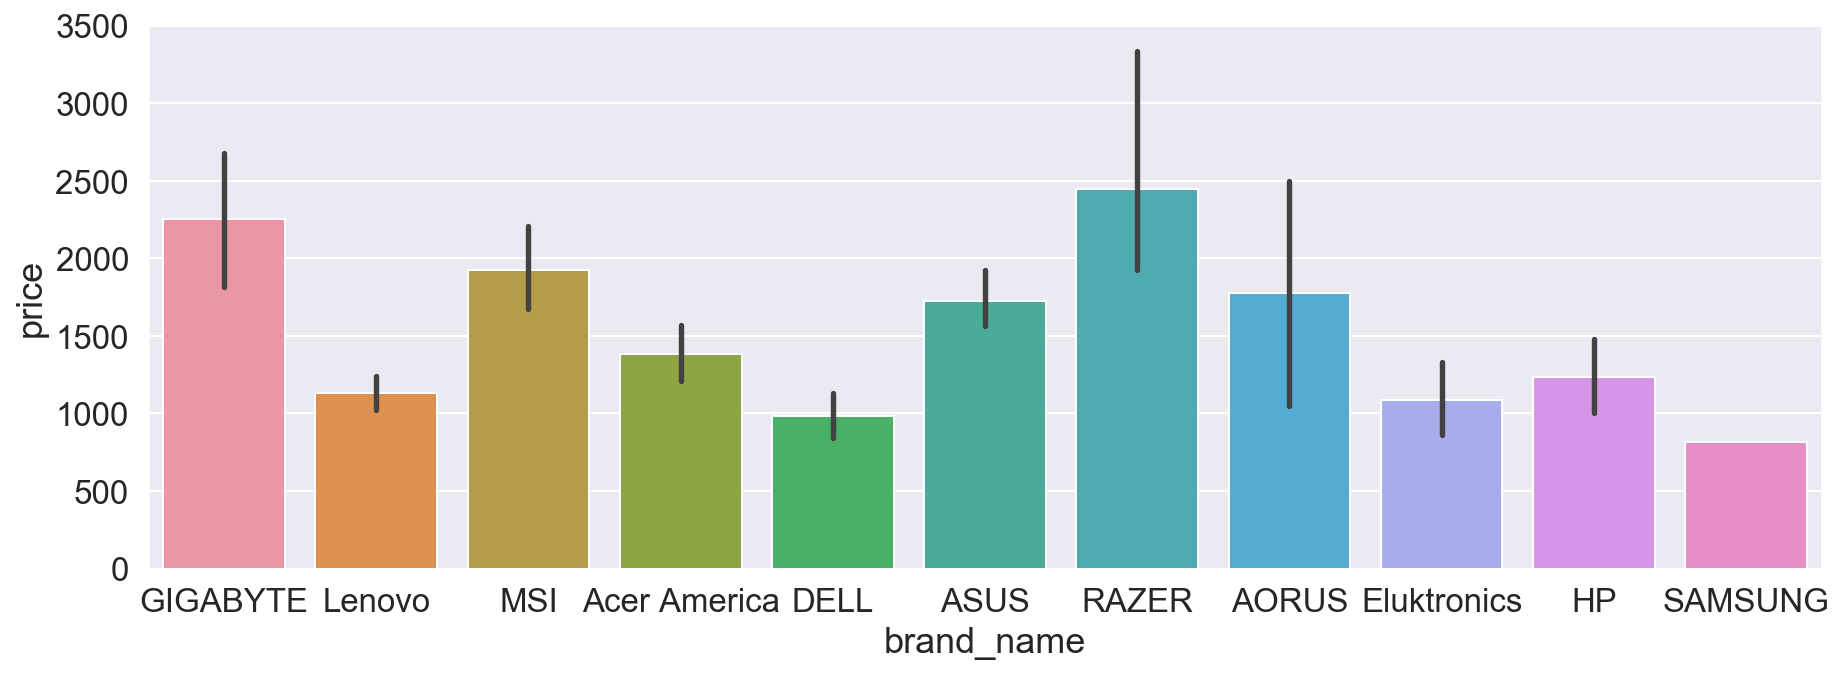

In [348]:
f , ax = plt.subplots(figsize=(15,5))
sns.barplot(data = df , x = 'brand_name' , y= 'price')

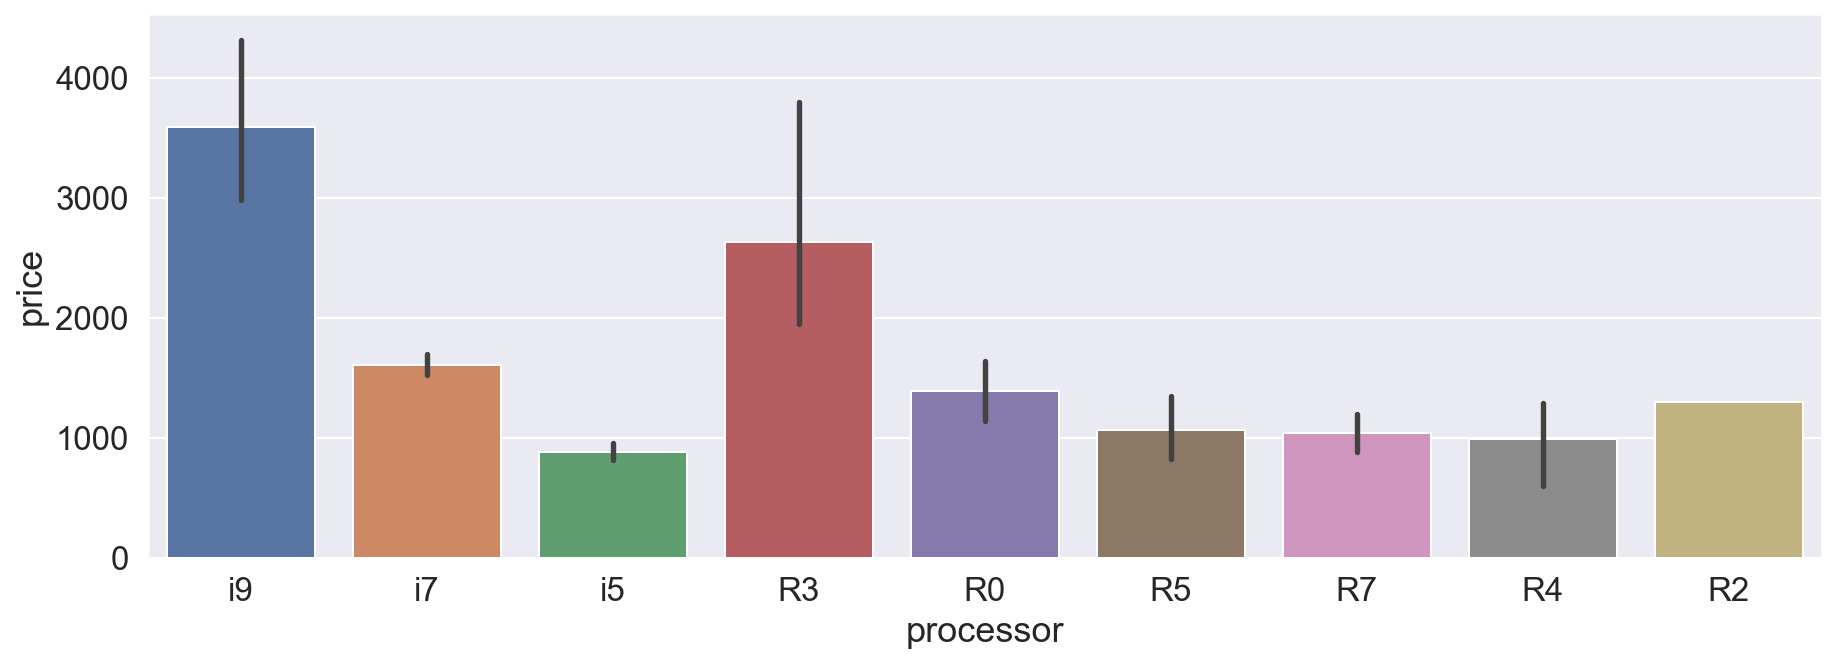

In [349]:
f , ax = plt.subplots(figsize=(15,5))
sns.barplot(data = df , x = 'processor' , y= 'price')

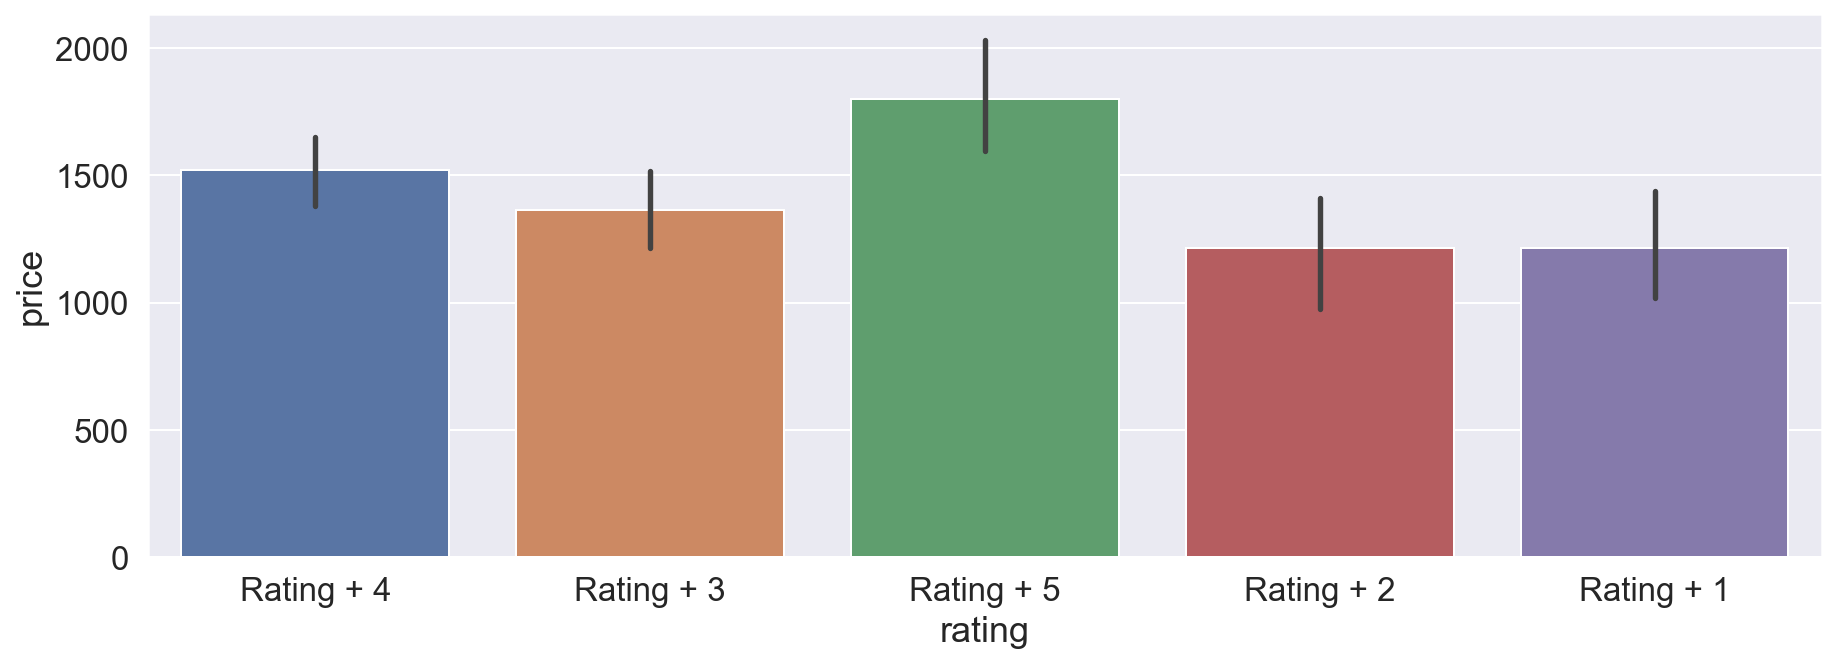

In [350]:
f , ax = plt.subplots(figsize=(15,5))
sns.barplot(data = df , x = 'rating' , y= 'price')

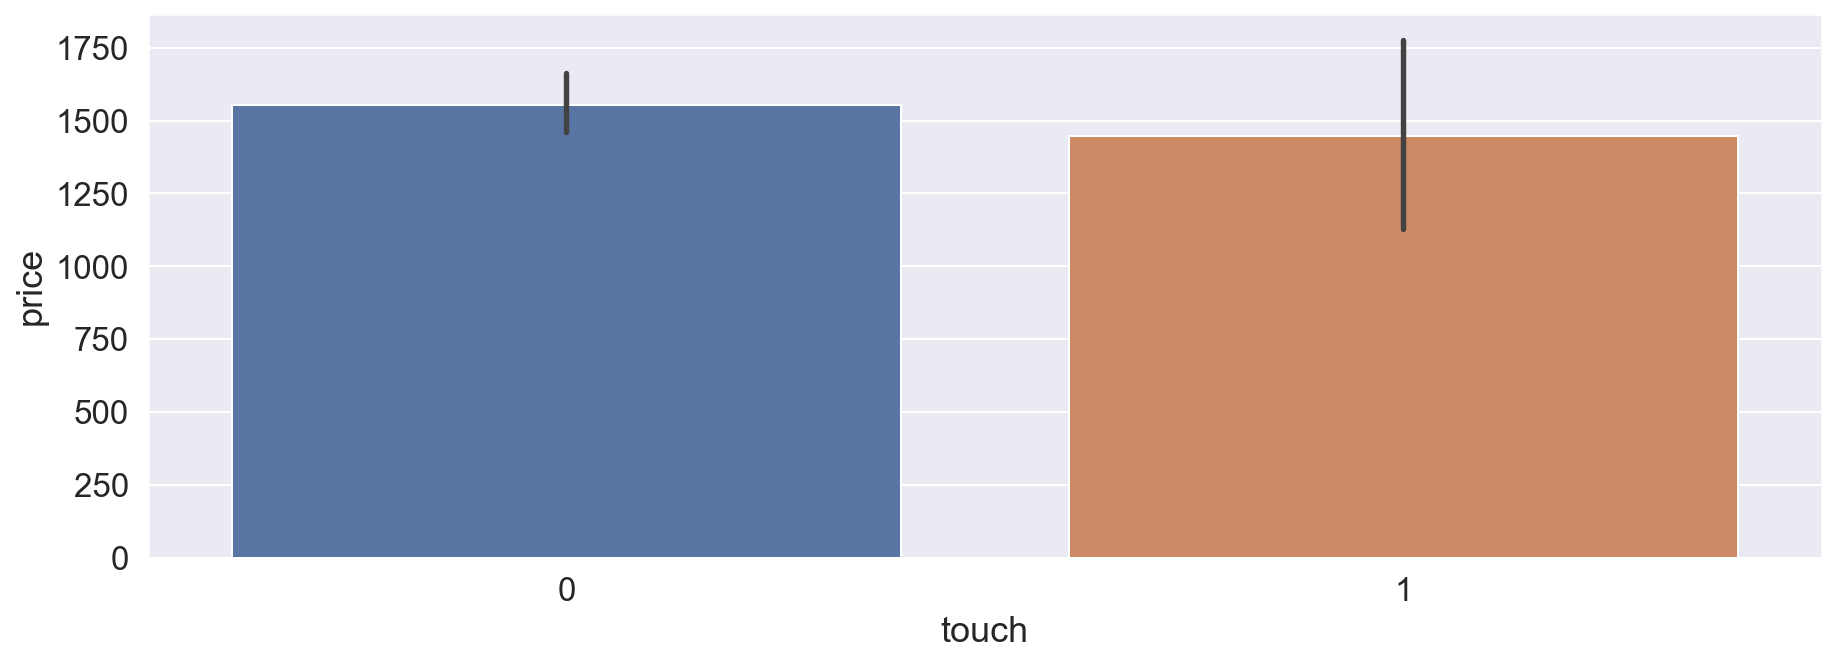

In [351]:
f , ax = plt.subplots(figsize=(15,5))
sns.barplot(data = df , x = 'touch' , y= 'price')

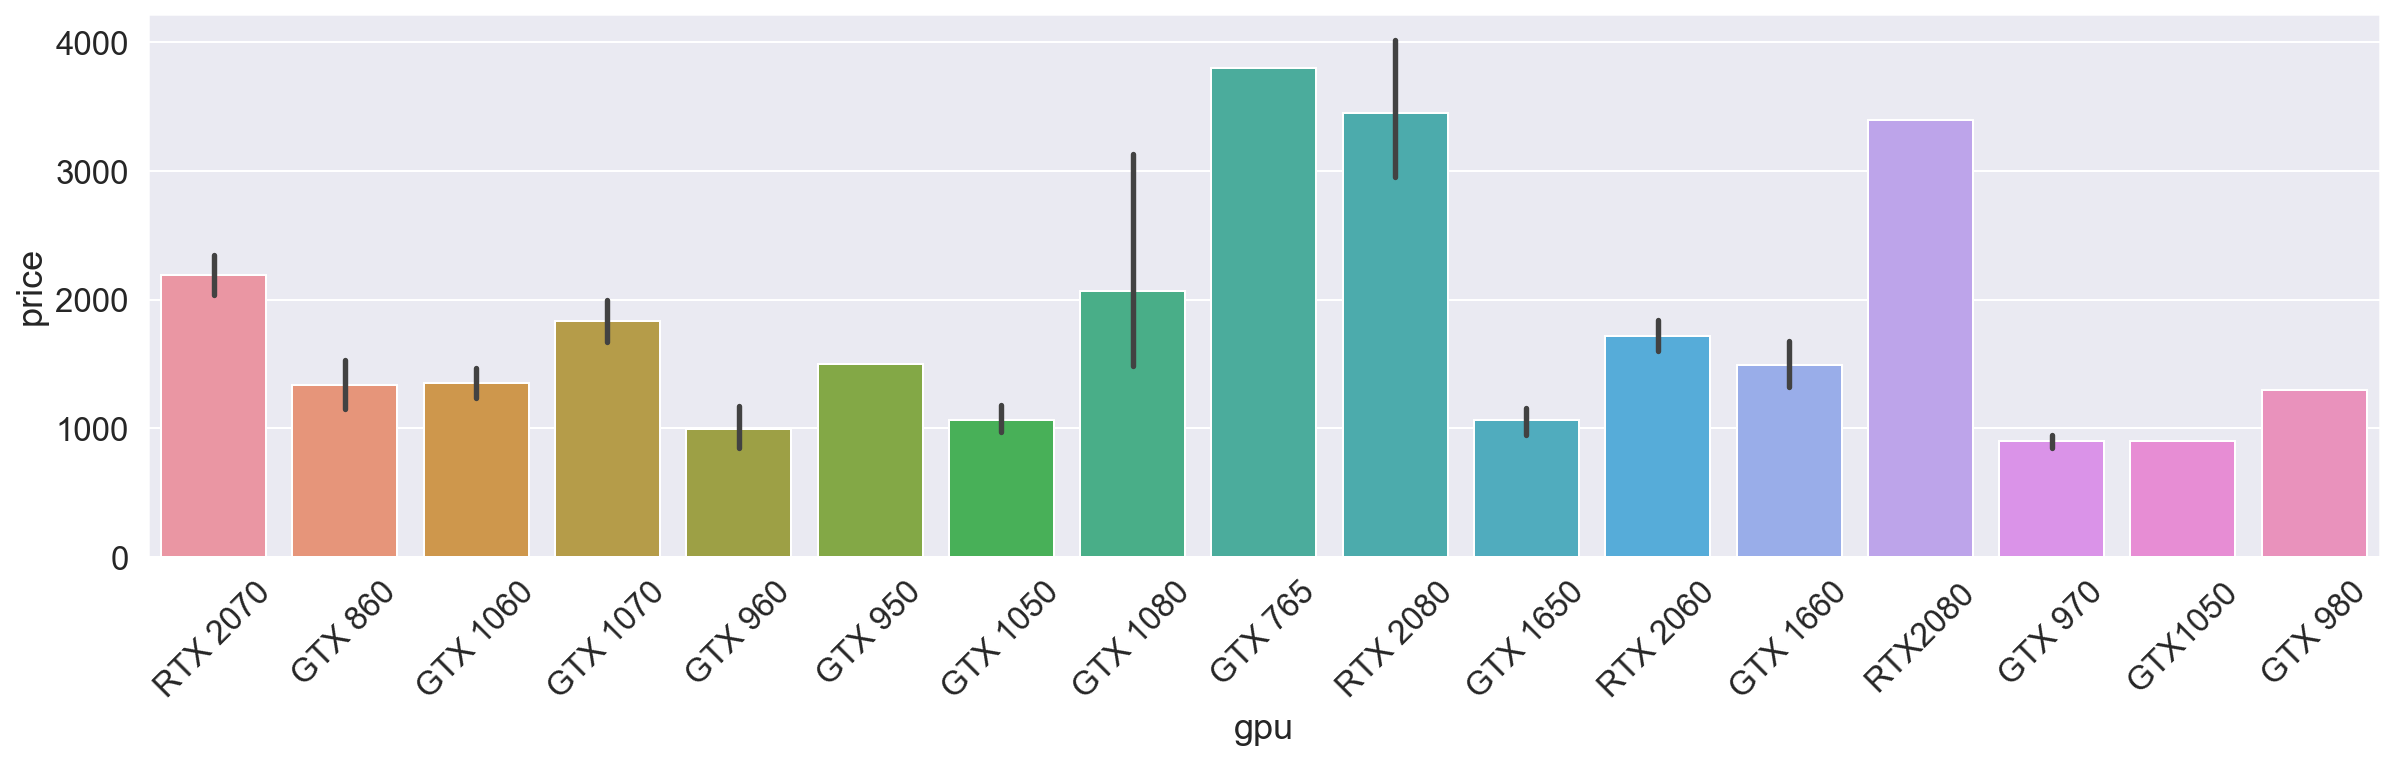

In [358]:
f , ax = plt.subplots(figsize=(20,5))
sns.barplot(data = df , x = 'gpu' , y= 'price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()